In [1]:
import pandas as pd

In [3]:
data=pd.read_csv("DisneylandReviews.csv",encoding="latin-1")

In [4]:
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
data.shape

(42656, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [7]:
data.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [8]:
data["Rating"].value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

In [9]:
import matplotlib.pyplot as plt 

<AxesSubplot: >

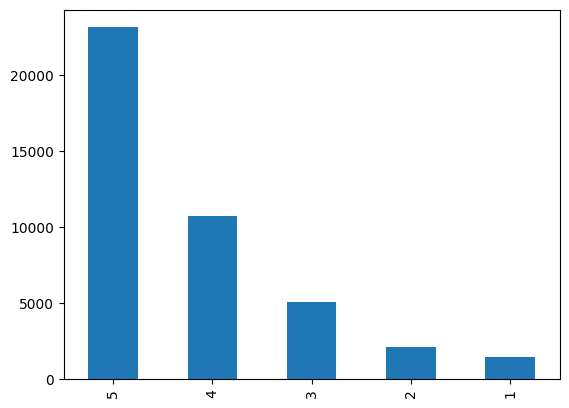

In [10]:
data["Rating"].value_counts().plot(kind="bar")

In [11]:
import seaborn as sns

<AxesSubplot: xlabel='count', ylabel='Branch'>

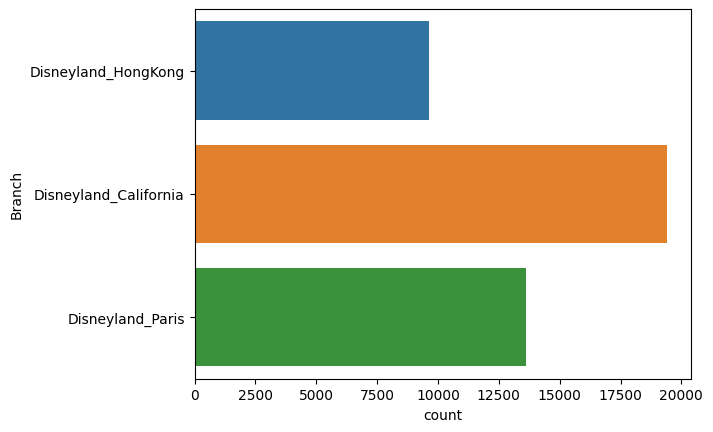

In [12]:
sns.countplot(y="Branch",data=data)

<AxesSubplot: xlabel='Rating', ylabel='Branch'>

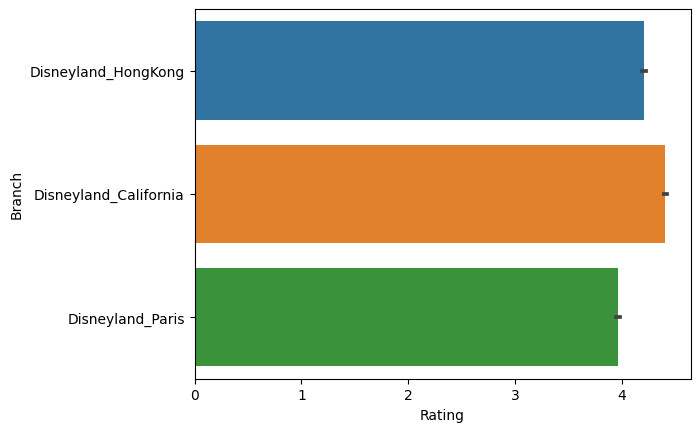

In [13]:
sns.barplot(y=data['Branch'],x=data["Rating"])

In [14]:
data.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

In [15]:
data=data.drop(columns=["Review_ID","Year_Month","Reviewer_Location","Branch"])

In [16]:
data

,Rating,Review_Text
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."
...,...,...
42651,5,i went to disneyland paris in july 03 and thou...
42652,5,2 adults and 1 child of 11 visited Disneyland ...
42653,5,My eleven year old daughter and myself went to...
42654,4,"This hotel, part of the Disneyland Paris compl..."


In [19]:
data=data[["Review_Text","Rating"]]

In [20]:
data

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4
...,...,...
42651,i went to disneyland paris in july 03 and thou...,5
42652,2 adults and 1 child of 11 visited Disneyland ...,5
42653,My eleven year old daughter and myself went to...,5
42654,"This hotel, part of the Disneyland Paris compl...",4


In [21]:
data.isnull().sum()

Review_Text    0
Rating         0
dtype: int64

In [22]:
data.duplicated().sum()

23

In [23]:
data.drop_duplicates(inplace=True)

C:\Users\haric\AppData\Local\Temp\ipykernel_21496\2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [24]:
data.duplicated().sum()

0

In [25]:
blank=[]

for index in data["Review_Text"]:
    if index.isspace()==True:
        blank.append(index)

In [26]:
blank

[]

In [27]:
def rating(rating):
    if rating>2 and rating <=5:
        return "positive"
    if rating>0 and rating<=2:
        return "negative"

In [28]:
data["scores"]=data["Rating"].apply(rating)

C:\Users\haric\AppData\Local\Temp\ipykernel_21496\2669021087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["scores"]=data["Rating"].apply(rating)


In [29]:
data.head()

,Review_Text,Rating,scores
0,If you've ever been to Disneyland anywhere you...,4,positive
1,Its been a while since d last time we visit HK...,4,positive
2,Thanks God it wasn t too hot or too humid wh...,4,positive
3,HK Disneyland is a great compact park. Unfortu...,4,positive
4,"the location is not in the city, took around 1...",4,positive


In [30]:
data["scores"].value_counts()

positive    39009
negative     3624
Name: scores, dtype: int64

In [31]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\haric\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [33]:
sentimentalazyer=SentimentIntensityAnalyzer()

In [34]:
testreview="hello,how are you "

In [35]:
sentimentalazyer.polarity_scores(testreview)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [36]:
 data["scores"]=data["Review_Text"].apply(lambda review: sentimentalazyer.polarity_scores(review))

C:\Users\haric\AppData\Local\Temp\ipykernel_21496\1026846704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["scores"]=data["Review_Text"].apply(lambda review: sentimentalazyer.polarity_scores(review))


In [37]:
data.head()

,Review_Text,Rating,scores
0,If you've ever been to Disneyland anywhere you...,4,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,4,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,4,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,4,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...",4,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."


In [55]:
 data["compound_scores"]=data["Review_Text"].apply(lambda review: sentimentalazyer.polarity_scores(review)["compound"])

C:\Users\haric\AppData\Local\Temp\ipykernel_21496\2031051395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["compound_scores"]=data["Review_Text"].apply(lambda review: sentimentalazyer.polarity_scores(review)["compound"])


In [56]:
def finalscore(review):
    if review >=0:
        return "positive"
    else:
        return "negative"

In [57]:
 data["compound_scores_pos_neg"]=data["compound_scores"].apply(finalscore)

C:\Users\haric\AppData\Local\Temp\ipykernel_21496\3433042193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["compound_scores_pos_neg"]=data["compound_scores"].apply(finalscore)


In [58]:
data.head()

,Review_Text,Rating,scores,compound_scores,compound_scores_pos_neg
0,If you've ever been to Disneyland anywhere you...,4,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069,positive
1,Its been a while since d last time we visit HK...,4,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901,positive
2,Thanks God it wasn t too hot or too humid wh...,4,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920,positive
3,HK Disneyland is a great compact park. Unfortu...,4,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489,positive
4,"the location is not in the city, took around 1...",4,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846,positive


In [59]:
data=data[["Review_Text","Rating","compound_scores_pos_neg"]]

In [60]:
data.head()

,Review_Text,Rating,compound_scores_pos_neg
0,If you've ever been to Disneyland anywhere you...,4,positive
1,Its been a while since d last time we visit HK...,4,positive
2,Thanks God it wasn t too hot or too humid wh...,4,positive
3,HK Disneyland is a great compact park. Unfortu...,4,positive
4,"the location is not in the city, took around 1...",4,positive


In [88]:
x=data["Review_Text"]
y=data["compound_scores_pos_neg"]

In [89]:
y

0        positive
1        positive
2        positive
3        positive
4        positive
           ...   
42651    positive
42652    positive
42653    positive
42654    positive
42655    positive
Name: compound_scores_pos_neg, Length: 42633, dtype: object

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [92]:
from sklearn.svm import  LinearSVC

In [93]:
from sklearn.pipeline import Pipeline

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
textclassifier=Pipeline(
    steps=[
        ("tfidvector",TfidfVectorizer()),
        ("clf",LinearSVC())
    ]
)

In [96]:
textclassifier.fit(x_train,y_train)

Pipeline(steps=[('tfidvector', TfidfVectorizer()), ('clf', LinearSVC())])

In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [98]:
predicion=textclassifier.predict(x_test)

In [99]:
accuracy_score(y_test,predicion)

0.9253322908522283

In [100]:
testreview=["the place is too good"]

In [101]:
textclassifier.predict(testreview)

array(['positive'], dtype=object)

In [102]:
confusion_matrix(y_test,predicion)

array([[  594,   719],
       [  236, 11241]], dtype=int64)